# Import All Python Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import time
import seaborn as sns  
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.feature_selection import f_classif, SelectKBest, VarianceThreshold
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Loading the Datasets

In [2]:
df = pd.read_csv('IoT Network Intrusion Dataset.csv')
total_instances = df.shape[0]

# Print the result
print("Total Instances:", total_instances)

Total Instances: 625783


# Some Basic Cleaning and EDA

In [3]:
# There are some infinite values in this column, which prevent saling. So, replacing them by max value of float64
Max_Val_Float_64 = np.finfo(np.float64).max
df['Flow_Byts/s'] = df['Flow_Byts/s'].replace([np.inf, -np.inf], Max_Val_Float_64)
df['Flow_Pkts/s'] = df['Flow_Pkts/s'].replace([np.inf, -np.inf], Max_Val_Float_64)

# Replace Missing Value

In [5]:
# Replace missing values with the mode for each column
df.fillna(df.mode().iloc[0], inplace=True)

In [6]:
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


# Data Encoding and Data Normalization

In [7]:
Categorical_Columns = df.select_dtypes(include=['object']).columns
Numerical_Columns = df.select_dtypes(include=['int64','float64']).columns

print("Categorical Columns: ", Categorical_Columns)
print("Numerical Columns: ", Numerical_Columns)

Categorical Columns:  Index(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat'], dtype='object')
Numerical Columns:  Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Fla

# Counting Labels 

In [8]:
# Count the number of samples for each class in the 'Label' column
label_counts = df['Label'].value_counts()

label_counts


Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64

In [9]:
# Count the number of samples for each class in the 'Label' column
cat_counts = df['Cat'].value_counts()

cat_counts

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64

In [10]:
# Count the number of samples for each sub-category in the 'Sub_Cat' column
sub_cat_counts = df['Sub_Cat'].value_counts()

sub_cat_counts


Sub_Cat
Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: count, dtype: int64

# Data Scaling and Encoding

In [11]:
# Assuming df is your DataFrame and Numerical_Columns contains the columns you want to scale
for col in Numerical_Columns:
    Scaler = MaxAbsScaler()
    df[col] = Scaler.fit_transform(df[col].astype(str).astype('float64').values.reshape(-1, 1))

for col in Categorical_Columns:
    if col != 'Label':
        LE = LabelEncoder()
        df[col] = LE.fit_transform(df[col].values.reshape(-1,1))
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446,25883,0.152672,203,0.154518,1.000000,3496,0.000750,0.005376,0.001786,...,0.0,0.0,0.0,0.000750,0.000000,0.000750,0.000750,Anomaly,2,2
1,22760,34617,0.033267,200,0.008475,0.352941,3664,0.053108,0.005376,0.003571,...,0.0,0.0,0.0,0.026557,0.033715,0.042551,0.010563,Anomaly,0,0
2,12691,25886,0.804992,200,0.137982,0.352941,2082,0.001410,0.000000,0.005357,...,0.0,0.0,0.0,0.000705,0.000011,0.000710,0.000700,Anomaly,4,8
3,12704,25886,0.808611,200,0.137982,0.352941,791,0.001510,0.000000,0.003571,...,0.0,0.0,0.0,0.001510,0.000000,0.001510,0.001510,Anomaly,2,4
4,611,25881,0.561267,317,0.029065,1.000000,1040,0.001530,0.010753,0.001786,...,0.0,0.0,0.0,0.000765,0.000011,0.000770,0.000760,Anomaly,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081,25889,0.856672,233,0.123036,1.000000,3443,0.002770,0.005376,0.001786,...,0.0,0.0,0.0,0.002771,0.000000,0.002771,0.002771,Anomaly,2,5
625779,18760,30623,0.069771,200,0.008475,0.352941,3637,0.016583,0.000000,0.003571,...,0.0,0.0,0.0,0.016584,0.000000,0.016584,0.016584,Anomaly,0,0
625780,12695,25886,0.805176,200,0.137982,0.352941,2285,0.000770,0.005376,0.001786,...,0.0,0.0,0.0,0.000770,0.000000,0.000770,0.000770,Anomaly,4,8
625781,12682,25883,0.137710,203,0.761561,0.352941,2872,0.002400,0.010753,0.001786,...,0.0,0.0,0.0,0.001200,0.000105,0.001250,0.001150,Normal,3,6


# Transform the Labels

In [12]:
str2idx_Label = {label:idx for idx, label in enumerate(df.Label.unique())}
str2idx_Label

{'Anomaly': 0, 'Normal': 1}

In [13]:
df.Label = df.Label.map(str2idx_Label)

In [15]:
# Count the number of samples for each class in the 'Label' column
label_counts = df['Label'].value_counts()

label_counts


Label
0    585710
1     40073
Name: count, dtype: int64

In [16]:
# Count the number of samples for each class in the 'Label' column
cat_counts = df['Cat'].value_counts()

cat_counts

Cat
2    415677
4     75265
0     59391
3     40073
1     35377
Name: count, dtype: int64

In [17]:
# Count the number of samples for each sub-category in the 'Sub_Cat' column
sub_cat_counts = df['Sub_Cat'].value_counts()

sub_cat_counts


Sub_Cat
5    183554
4    121181
0     59391
3     55818
2     55124
8     53073
6     40073
1     35377
7     22192
Name: count, dtype: int64

# Data Splitting 

In [18]:
x = df.drop('Label',axis=1)
y = df.Label

In [19]:
# Separate features (x) and labels (y)
x = df.drop('Label', axis=1)
y = df['Label']

# Concatenate x and y to create a new DataFrame
df1 = pd.concat([x, y], axis=1)

# Print the new DataFrame
print("New DataFrame:")
print(df1)


New DataFrame:
        Flow_ID  Src_IP  Src_Port  Dst_IP  Dst_Port  Protocol  Timestamp  \
0         12446   25883  0.152672     203  0.154518  1.000000       3496   
1         22760   34617  0.033267     200  0.008475  0.352941       3664   
2         12691   25886  0.804992     200  0.137982  0.352941       2082   
3         12704   25886  0.808611     200  0.137982  0.352941        791   
4           611   25881  0.561267     317  0.029065  1.000000       1040   
...         ...     ...       ...     ...       ...       ...        ...   
625778    62081   25889  0.856672     233  0.123036  1.000000       3443   
625779    18760   30623  0.069771     200  0.008475  0.352941       3637   
625780    12695   25886  0.805176     200  0.137982  0.352941       2285   
625781    12682   25883  0.137710     203  0.761561  0.352941       2872   
625782    12446   25883  0.152672     203  0.154518  1.000000       3453   

        Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  \
0 

In [20]:
df1

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,Sub_Cat,Label
0,12446,25883,0.152672,203,0.154518,1.000000,3496,0.000750,0.005376,0.001786,...,0.0,0.0,0.0,0.000750,0.000000,0.000750,0.000750,2,2,0
1,22760,34617,0.033267,200,0.008475,0.352941,3664,0.053108,0.005376,0.003571,...,0.0,0.0,0.0,0.026557,0.033715,0.042551,0.010563,0,0,0
2,12691,25886,0.804992,200,0.137982,0.352941,2082,0.001410,0.000000,0.005357,...,0.0,0.0,0.0,0.000705,0.000011,0.000710,0.000700,4,8,0
3,12704,25886,0.808611,200,0.137982,0.352941,791,0.001510,0.000000,0.003571,...,0.0,0.0,0.0,0.001510,0.000000,0.001510,0.001510,2,4,0
4,611,25881,0.561267,317,0.029065,1.000000,1040,0.001530,0.010753,0.001786,...,0.0,0.0,0.0,0.000765,0.000011,0.000770,0.000760,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081,25889,0.856672,233,0.123036,1.000000,3443,0.002770,0.005376,0.001786,...,0.0,0.0,0.0,0.002771,0.000000,0.002771,0.002771,2,5,0
625779,18760,30623,0.069771,200,0.008475,0.352941,3637,0.016583,0.000000,0.003571,...,0.0,0.0,0.0,0.016584,0.000000,0.016584,0.016584,0,0,0
625780,12695,25886,0.805176,200,0.137982,0.352941,2285,0.000770,0.005376,0.001786,...,0.0,0.0,0.0,0.000770,0.000000,0.000770,0.000770,4,8,0
625781,12682,25883,0.137710,203,0.761561,0.352941,2872,0.002400,0.010753,0.001786,...,0.0,0.0,0.0,0.001200,0.000105,0.001250,0.001150,3,6,1


# Technique for Balancing Datasets

In [21]:
# Assuming x and y are original features and labels
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Create a Pandas Series from the resampled labels and print the counts
print("Number of samples after applying SMOTE:")
print(pd.Series(y_resampled).value_counts())


Number of samples after applying SMOTE:
Label
0    585710
1    585710
Name: count, dtype: int64


In [22]:
# Assuming x and y are original features and labels
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Split the resampled data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


# Print the counts of classes in the training set
print("Number of samples in the training set:")
print(pd.Series(y_train).value_counts())

# Print the counts of classes in the testing set
print("\nNumber of samples in the testing set:")
print(pd.Series(y_test).value_counts())


Number of samples in the training set:
Label
1    468568
0    468568
Name: count, dtype: int64

Number of samples in the testing set:
Label
1    117142
0    117142
Name: count, dtype: int64


In [23]:
'''# Assuming you have y_train and y_test
# Print the counts of classes in the training set separately for 0 and 1
print("Number of samples in the training set:")
print(pd.Series(y_train).value_counts())

# Print the counts of classes in the testing set separately for 0 and 1
print("\nNumber of samples in the testing set:")
print(pd.Series(y_test).value_counts())'''

# Combine 0 and 1 class label counts separately for training and testing sets
train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts() 

# Print the combined counts for both classes in the training set
print("\nCombined counts for classes 0 and 1 in the training set:")
print(train_class_counts) 

# Print the combined counts for both classes in the testing set
print("\nCombined counts for classes 0 and 1 in the testing set:")
print(test_class_counts)

# Calculate and print the total counts for both classes
total_train_samples = train_class_counts.sum()
total_test_samples = test_class_counts.sum()

print("\nTotal count for both classes in the training set:", total_train_samples)
print("Total count for both classes in the testing set:", total_test_samples)



Combined counts for classes 0 and 1 in the training set:
Label
1    468568
0    468568
Name: count, dtype: int64

Combined counts for classes 0 and 1 in the testing set:
Label
1    117142
0    117142
Name: count, dtype: int64

Total count for both classes in the training set: 937136
Total count for both classes in the testing set: 234284


In [24]:
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446,25883,0.152672,203,0.154518,1.000000,3496,0.000750,0.005376,0.001786,...,0.0,0.0,0.0,0.000750,0.000000,0.000750,0.000750,0,2,2
1,22760,34617,0.033267,200,0.008475,0.352941,3664,0.053108,0.005376,0.003571,...,0.0,0.0,0.0,0.026557,0.033715,0.042551,0.010563,0,0,0
2,12691,25886,0.804992,200,0.137982,0.352941,2082,0.001410,0.000000,0.005357,...,0.0,0.0,0.0,0.000705,0.000011,0.000710,0.000700,0,4,8
3,12704,25886,0.808611,200,0.137982,0.352941,791,0.001510,0.000000,0.003571,...,0.0,0.0,0.0,0.001510,0.000000,0.001510,0.001510,0,2,4
4,611,25881,0.561267,317,0.029065,1.000000,1040,0.001530,0.010753,0.001786,...,0.0,0.0,0.0,0.000765,0.000011,0.000770,0.000760,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081,25889,0.856672,233,0.123036,1.000000,3443,0.002770,0.005376,0.001786,...,0.0,0.0,0.0,0.002771,0.000000,0.002771,0.002771,0,2,5
625779,18760,30623,0.069771,200,0.008475,0.352941,3637,0.016583,0.000000,0.003571,...,0.0,0.0,0.0,0.016584,0.000000,0.016584,0.016584,0,0,0
625780,12695,25886,0.805176,200,0.137982,0.352941,2285,0.000770,0.005376,0.001786,...,0.0,0.0,0.0,0.000770,0.000000,0.000770,0.000770,0,4,8
625781,12682,25883,0.137710,203,0.761561,0.352941,2872,0.002400,0.010753,0.001786,...,0.0,0.0,0.0,0.001200,0.000105,0.001250,0.001150,1,3,6


# Feature Selection

In [25]:
def feature_selection_decisiontree(xtrain, ytrain, num_features=10):
    '''
    Function to select features based on Decision Tree feature importance
    '''
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(xtrain, ytrain)

    feature_importances = clf.feature_importances_

    selected_features = np.argsort(feature_importances)[::-1]
    selected_features = selected_features[:num_features]

    return xtrain.columns[selected_features]

# Assuming you have y_train and y_test
# Define the number of features you want to select
num_features_decision_tree = 10  # Adjust as needed

# Perform feature selection using Decision Tree feature importance
best_features_decision_tree = list(feature_selection_decisiontree(x_train, y_train, num_features=num_features_decision_tree))
print('The best features based on Decision Tree feature importance are: ', best_features_decision_tree)

# Remove 'Label' from the best features list
if 'Label' in best_features_decision_tree:
    best_features_decision_tree.remove('Label')

# Select only the best features in the training and testing sets
xtest = x_test[best_features_decision_tree]
xtrain = x_train[best_features_decision_tree]

# Print the shapes of the resulting datasets
print("Train (Decision Tree): ", xtrain.shape, y_train.shape)
print("Test (Decision Tree): ", xtest.shape, y_test.shape)


The best features based on Decision Tree feature importance are:  ['Cat', 'Bwd_IAT_Tot', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min']
Train (Decision Tree):  (937136, 10) (937136,)
Test (Decision Tree):  (234284, 10) (234284,)


# Model Training and Evaluation

In [26]:
# Add this line at the beginning of your notebook to display plots inline
%matplotlib inline

def Train_Model(Model, xtrain, ytrain, xtest, ytest):
    start = time.time()
    Model.fit(xtrain, ytrain)
    end = time.time()
    Train_Time_Taken = end - start
    
    # Calculate predictions on the training set
    start_train_predict = time.time()
    ypred_train = Model.predict(xtrain)
    end_train_predict = time.time()
    Train_Predict_Time_Taken = end_train_predict - start_train_predict
    
    # Calculate and print results on the training set
    Acc_train = accuracy_score(ytrain, ypred_train) * 100
    Prec_train = precision_score(ytrain, ypred_train, average='macro') * 100
    Rec_train = recall_score(ytrain, ypred_train, average='macro') * 100
    F1_train = f1_score(ytrain, ypred_train, average='macro') * 100
    
    print("Results on the Training Set:")
    print(classification_report(ytrain, ypred_train))
    print(f"Accuracy: {Acc_train}")
    print(f"Precision: {Prec_train}")
    print(f"Recall: {Rec_train}")
    print(f"F1: {F1_train}")
    print(f"Training Time Taken: {Train_Time_Taken}")
    print(f"Training Prediction Time Taken: {Train_Predict_Time_Taken}")
    sns.heatmap(confusion_matrix(ytrain, ypred_train), annot=True, fmt='d')
    plt.show()
    print()

    # Calculate predictions on the testing set
    start_test_predict = time.time()
    ypred_test = Model.predict(xtest)
    end_test_predict = time.time()
    Test_Predict_Time_Taken = end_test_predict - start_test_predict
    
    # Calculate and print results on the testing set
    Acc_test = accuracy_score(ytest, ypred_test) * 100
    Prec_test = precision_score(ytest, ypred_test, average='macro') * 100
    Rec_test = recall_score(ytest, ypred_test, average='macro') * 100
    F1_test = f1_score(ytest, ypred_test, average='macro') * 100
    
    print("Results on the Testing Set:")
    print(classification_report(ytest, ypred_test))
    print(f"Accuracy: {Acc_test}")
    print(f"Precision: {Prec_test}")
    print(f"Recall: {Rec_test}")
    print(f"F1: {F1_test}")
    print(f"Testing Prediction Time Taken: {Test_Predict_Time_Taken}")
    sns.heatmap(confusion_matrix(ytest, ypred_test), annot=True, fmt='d')
    plt.show()
    print()

    return Acc_train, Prec_train, Rec_train, F1_train, Train_Time_Taken, Train_Predict_Time_Taken, Acc_test, Prec_test, Rec_test, F1_test, Test_Predict_Time_Taken

In [27]:
print(xtest)
print(xtrain)


        Cat  Bwd_IAT_Tot  Flow_IAT_Std  Flow_IAT_Max  Flow_IAT_Min  \
717330    3     0.004007      0.000000      0.004007      0.004007   
691949    3     0.005191      0.002455      0.003655      0.000740   
843638    3     0.003969      0.000000      0.003969      0.003969   
802423    3     0.000000      0.000563      0.001892      0.001351   
657541    3     0.000762      0.000000      0.000762      0.000762   
...     ...          ...           ...           ...           ...   
572029    2     0.000000      0.000302      0.000860      0.000010   
194415    2     0.000000      0.000000      0.000120      0.000120   
229070    4     0.000740      0.000000      0.000740      0.000740   
182109    2     0.000000      0.000000      0.000020      0.000020   
988521    3     0.003370      0.000000      0.003370      0.003370   

        Fwd_IAT_Tot  Fwd_IAT_Mean  Fwd_IAT_Std  Fwd_IAT_Max  Fwd_IAT_Min  
717330     0.000000      0.000000       0.0000     0.000000     0.000000  
691949   

In [28]:
# Add any other models you want to use
Models = {
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier()
    # Add other models here if needed
}

def Train_Model(Model, xtrain, ytrain, xtest, ytest):
    start_total_time = time.time()  # Start total time
    
    # Training
    start_train_time = time.time()
    Model.fit(xtrain, ytrain)
    end_train_time = time.time()
    
    # Testing (Prediction)
    start_test_time = time.time()
    predictions_test = Model.predict(xtest)
    end_test_time = time.time()

    # Training (Prediction)
    start_train_predict_time = time.time()
    predictions_train = Model.predict(xtrain)
    end_train_predict_time = time.time()

    end_total_time = time.time()  # End total time
    
    # Calculating metrics
    Acc_test = accuracy_score(ytest, predictions_test)
    Prec_test = precision_score(ytest, predictions_test)
    Rec_test = recall_score(ytest, predictions_test)
    F1_test = f1_score(ytest, predictions_test)
    tn, fp, fn, tp = confusion_matrix(ytest, predictions_test).ravel()
    FPR_test = fp / (fp + tn)
    
    Acc_train = accuracy_score(ytrain, predictions_train)
    Prec_train = precision_score(ytrain, predictions_train)
    Rec_train = recall_score(ytrain, predictions_train)
    F1_train = f1_score(ytrain, predictions_train)
    tn, fp, fn, tp = confusion_matrix(ytrain, predictions_train).ravel()
    FPR_train = fp / (fp + tn)
    
    return {
        'Acc_train': Acc_train,
        'Prec_train': Prec_train,
        'Rec_train': Rec_train,
        'F1_train': F1_train,
        'FPR_train': FPR_train,
        'Acc_test': Acc_test, 
        'Prec_test': Prec_test, 
        'Rec_test': Rec_test, 
        'F1_test': F1_test, 
        'FPR_test': FPR_test, 
        'Train_Time': end_train_time - start_train_time, 
        'Train_Predict_Time': end_train_predict_time - start_train_predict_time,
        'Test_Time': end_test_time - start_test_time, 
        'Total_Time': end_total_time - start_total_time
    }

Result_DF = pd.DataFrame(columns=['Model', 'Acc_train', 'Prec_train', 'Rec_train', 'F1_train', 'FPR_train', 'Acc_test', 'Prec_test', 'Rec_test', 'F1_test', 'FPR_test', 'Train_Time', 'Train_Predict_Time', 'Test_Time', 'Total_Time'])

for idxModel, Model in Models.items():
    print(f'Model being trained: {idxModel}')
    results = Train_Model(Model, x_train, y_train, x_test, y_test)
    
    # Append the results to the DataFrame
    Result_DF = Result_DF._append({
        'Model': idxModel, 
        'Acc_train': results['Acc_train'],
        'Prec_train': results['Prec_train'],
        'Rec_train': results['Rec_train'],
        'F1_train': results['F1_train'],
        'FPR_train': results['FPR_train'],
        'Acc_test': results['Acc_test'], 
        'Prec_test': results['Prec_test'], 
        'Rec_test': results['Rec_test'], 
        'F1_test': results['F1_test'], 
        'FPR_test': results['FPR_test'], 
        'Train_Time': results['Train_Time'], 
        'Train_Predict_Time': results['Train_Predict_Time'],
        'Test_Time': results['Test_Time'], 
        'Total_Time': results['Total_Time']
    }, ignore_index=True)

print(Result_DF)

Model being trained: Logistic Regression
Model being trained: AdaBoost
Model being trained: Random Forest
                 Model  Acc_train  Prec_train  Rec_train  F1_train  FPR_train  \
0  Logistic Regression   0.895286    0.859049    0.94575  0.900317   0.155177   
1             AdaBoost   1.000000    1.000000    1.00000  1.000000   0.000000   
2        Random Forest   1.000000    1.000000    1.00000  1.000000   0.000000   

   Acc_test  Prec_test  Rec_test  F1_test  FPR_test   Train_Time  \
0   0.89403   0.857309  0.945417  0.89921  0.157356    33.736449   
1   1.00000   1.000000  1.000000  1.00000  0.000000   401.148778   
2   1.00000   1.000000  1.000000  1.00000  0.000000  2509.459947   

   Train_Predict_Time  Test_Time   Total_Time  
0            1.626812   0.489520    35.852785  
1           30.002736   3.747874   434.899392  
2           14.081249   4.026266  2527.567465  


# Evaluating Models for Resource Utilization 

Model being trained: Logistic Regression
Model being trained: AdaBoost
Model being trained: Random Forest


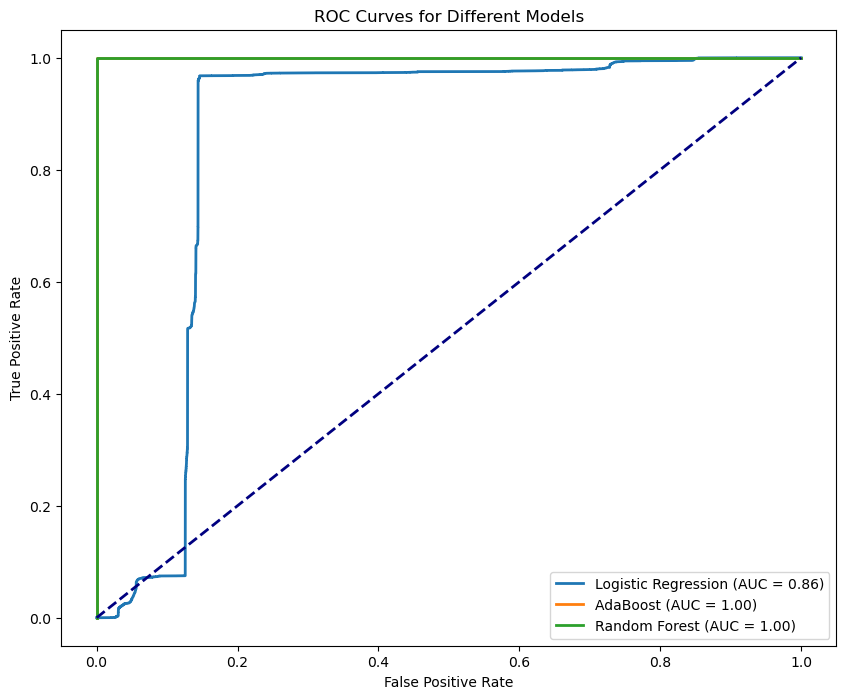

                 Model  Accuracy  Precision    Recall  F1-Score  Train Time  \
0  Logistic Regression  0.887521   0.833767  0.968047  0.895904   29.844603   
1             AdaBoost  1.000000   1.000000  1.000000  1.000000  412.064197   
2        Random Forest  1.000000   1.000000  1.000000  1.000000  183.677026   

   Test Time  False Positive Rate  Total Time   ROC AUC  
0   1.238183             0.193005   31.082789  0.855303  
1   2.637266             0.000000  414.701465  1.000000  
2   1.186356             0.000000  184.863382  1.000000  


In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Add any other models
Models = {
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier()
    # Add other models here if needed
}

def Train_Model(Model, xtrain, ytrain, xtest, ytest):
    start_total_time = time.time()  # Start total time
    
   # Training
    start_train_time = time.time()
    Model.fit(xtrain, ytrain)
    end_train_time = time.time()
    
    # Testing (Prediction)
    start_test_time = time.time()
    predictions = Model.predict(xtest)
    end_test_time = time.time()

    end_total_time = time.time()  # End total time 
    
    # Calculating metrics
    Acc = accuracy_score(ytest, predictions)
    Prec = precision_score(ytest, predictions)
    Rec = recall_score(ytest, predictions)
    F1 = f1_score(ytest, predictions)
    tn, fp, fn, tp = confusion_matrix(ytest, predictions).ravel()
    FPR = fp / (fp + tn)
    
    # ROC AUC calculation
    y_prob = Model.predict_proba(xtest)[:, 1]
    roc_auc = roc_auc_score(ytest, y_prob)
    
    return Acc, Prec, Rec, F1, end_train_time - start_train_time, end_test_time - start_test_time, FPR, end_total_time - start_total_time, roc_auc

Result_DF = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Train Time', 'Test Time', 'False Positive Rate', 'Total Time', 'ROC AUC'])

# Lists to store data for plotting
all_fpr = []
all_tpr = []
all_auc = []

for idxModel, Model in Models.items():
    print(f'Model being trained: {idxModel}')
    Acc, Prec, Rec, F1, Train_Time, Test_Time, FPR, Total_Time, ROC_AUC = Train_Model(Model, x_resampled, y_resampled, x_test, y_test)
    Result_DF = Result_DF._append({
        'Model': idxModel, 
        'Accuracy': Acc, 
        'Precision': Prec, 
        'Recall': Rec, 
        'F1-Score': F1, 
        'Train Time': Train_Time, 
        'Test Time': Test_Time, 
        'False Positive Rate': FPR, 
        'Total Time': Total_Time,
        'ROC AUC': ROC_AUC
    }, ignore_index=True)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, Model.predict_proba(x_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(roc_auc)

# Plot all ROC curves together
plt.figure(figsize=(10, 8))
for i in range(len(Models)):
    plt.plot(all_fpr[i], all_tpr[i], lw=2, label=f'{list(Models.keys())[i]} (AUC = {all_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

print(Result_DF)
